In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score

In [2]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data_train.shape

(8523, 12)

In [6]:
data_test.shape

(5681, 11)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
data_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
data_test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [15]:
data_train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
data_test["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [17]:
data_train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [18]:
data_train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
data_train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [20]:
data_test["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

## Data Cleaning

### Item_Weight

<Axes: xlabel='Item_Weight'>

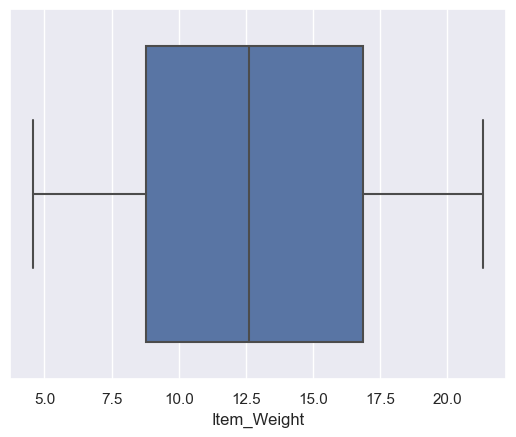

In [21]:
sns.boxplot(x = "Item_Weight", data = data_train)

<Axes: xlabel='Item_Weight'>

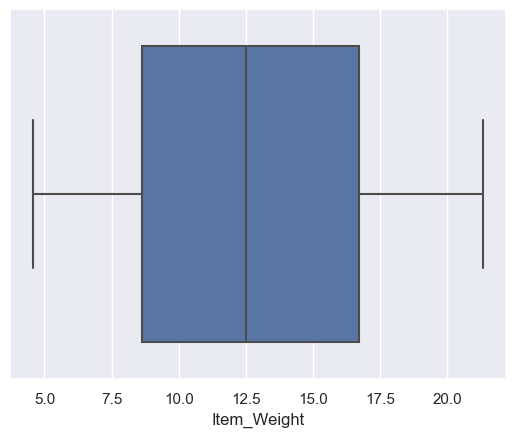

In [22]:
sns.boxplot(x = "Item_Weight", data = data_test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [23]:
data_train["Item_Weight"] = data_train["Item_Weight"].fillna(data_train["Item_Weight"].mean())
data_test["Item_Weight"] = data_test["Item_Weight"].fillna(data_test["Item_Weight"].mean())

In [24]:
# now checking the null values
data_train["Item_Weight"].isnull().sum(), data_test["Item_Weight"].isnull().sum() 

(0, 0)

### Outlet_size

In [25]:
print(data_train["Outlet_Size"].value_counts())
print("-------------------------------------------")
print(data_test["Outlet_Size"].value_counts())

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
-------------------------------------------
Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64


#### outlet_size is a categorical feature, so we can impute the missing value by "Mode" from the feature

In [26]:
data_train["Outlet_Size"] = data_train["Outlet_Size"].fillna(data_train["Outlet_Size"].mode()[0])
data_test["Outlet_Size"] = data_test["Outlet_Size"].fillna(data_test["Outlet_Size"].mode()[0])

In [27]:
# now checking the null values
data_train["Outlet_Size"].isnull().sum(), data_test["Outlet_Size"].isnull().sum() 

(0, 0)

In [28]:
data_train["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"], inplace = True)
data_test["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"], inplace = True)

In [29]:
data_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [30]:
data_test["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [33]:
data_train["Years_Established"] = data_train["Outlet_Establishment_Year"].apply(lambda x : 2023 - x)
data_test["Years_Established"] = data_test["Outlet_Establishment_Year"].apply(lambda x : 2023 - x)

In [34]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [35]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38


## Exploratory Data Analysis

### Item Fat Content

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

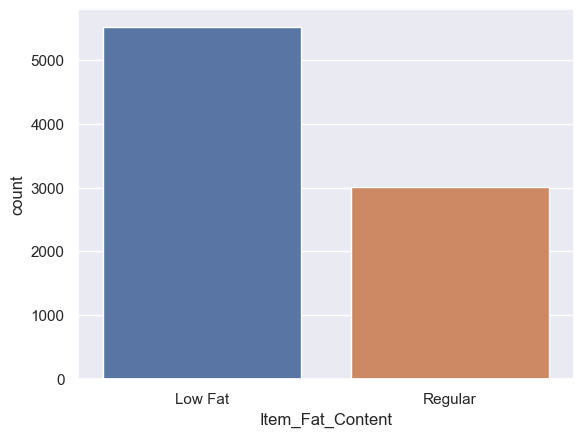

In [36]:
sns.countplot(x = "Item_Fat_Content", data = data_train)

Items bought are more of Low Fat

### Item Type

<Axes: xlabel='Item_Type', ylabel='count'>

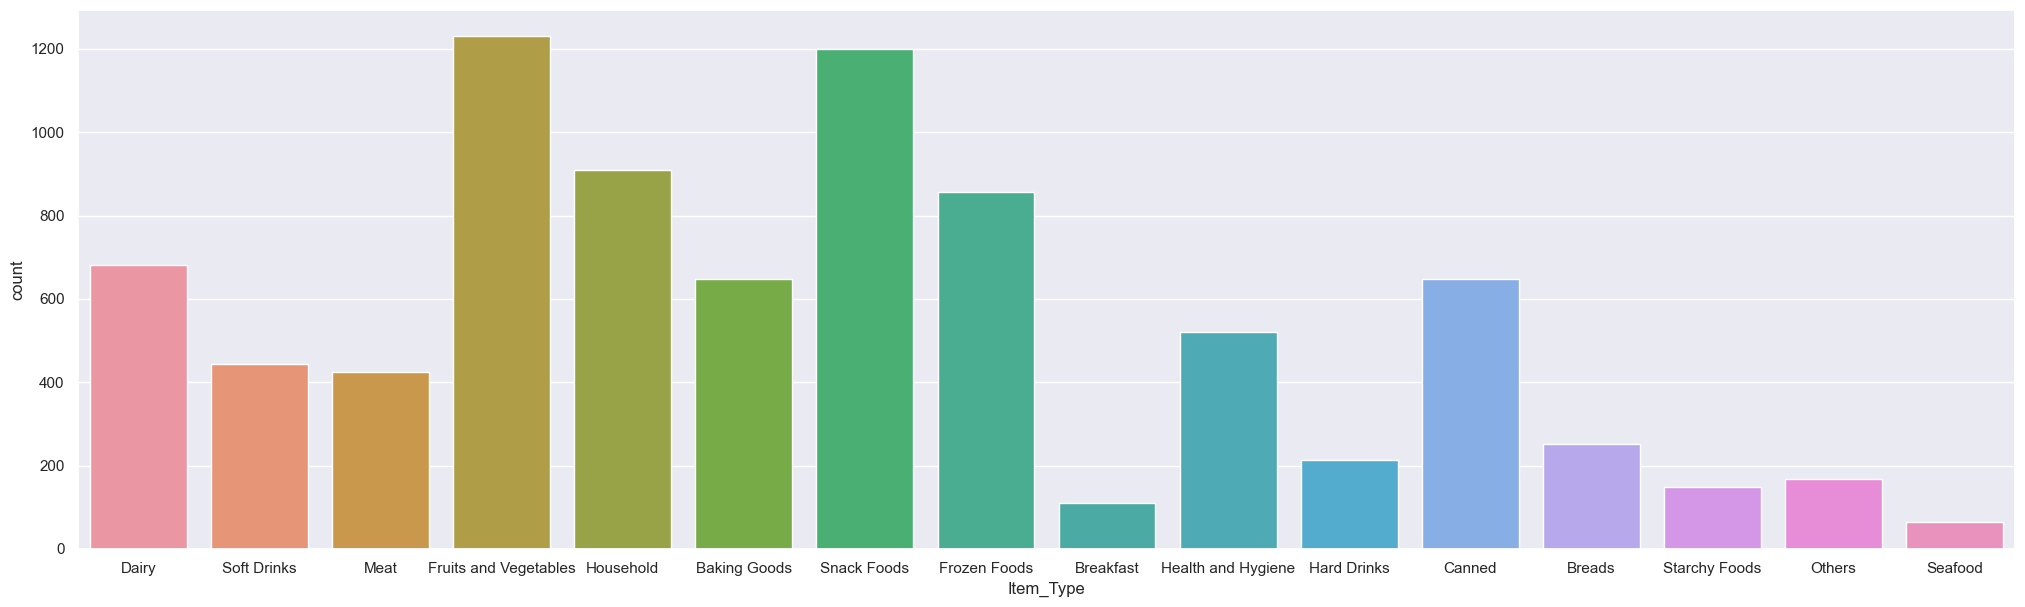

In [37]:
plt.figure(figsize=(25,7))
sns.countplot(x = "Item_Type", data = data_train)

Fruits and vegetables, Snack Foods are used more in daily purpose which makes sense

### Outlet Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

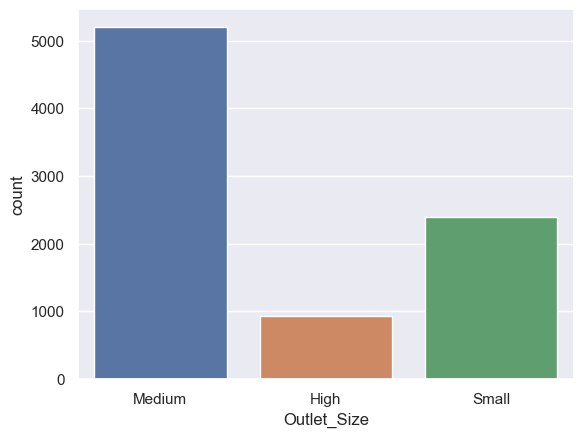

In [38]:
sns.countplot(x = "Outlet_Size", data = data_train)

There are more medium sized outlets

### Outlet Location Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

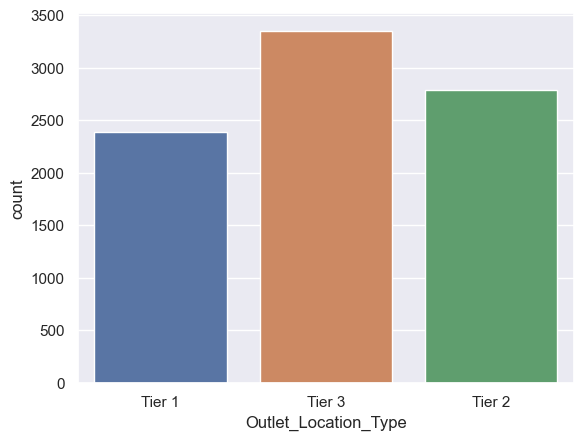

In [39]:
sns.countplot(x = "Outlet_Location_Type", data = data_train)

### Outlet Type

<Axes: xlabel='Outlet_Type', ylabel='count'>

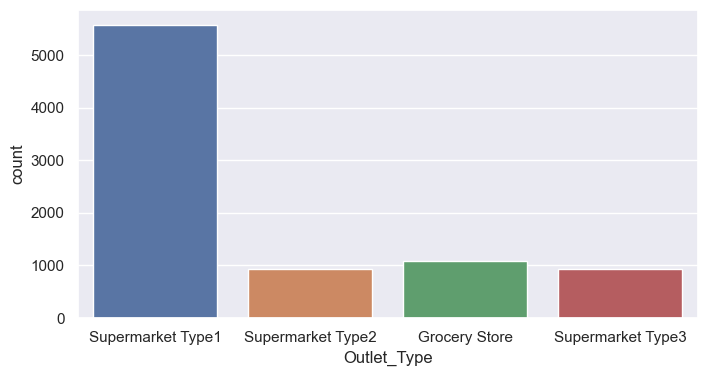

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Outlet_Type", data = data_train)

<Axes: xlabel='Years_Established', ylabel='count'>

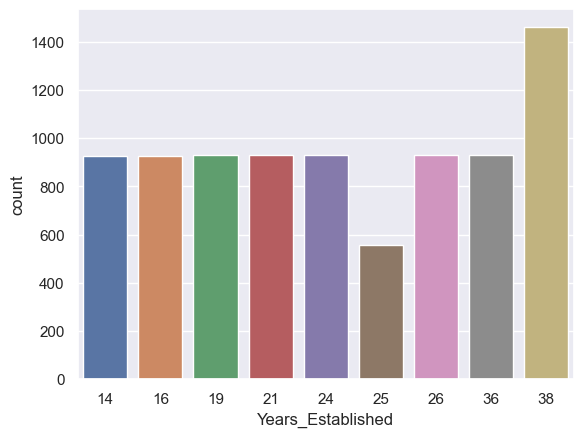

In [41]:
sns.countplot(x = "Years_Established", data = data_train)

There are more outlets which are running from many years

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

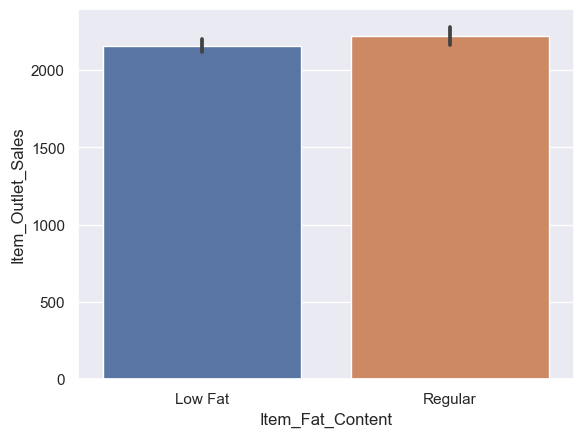

In [42]:
sns.barplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = data_train)

### Item Visibility

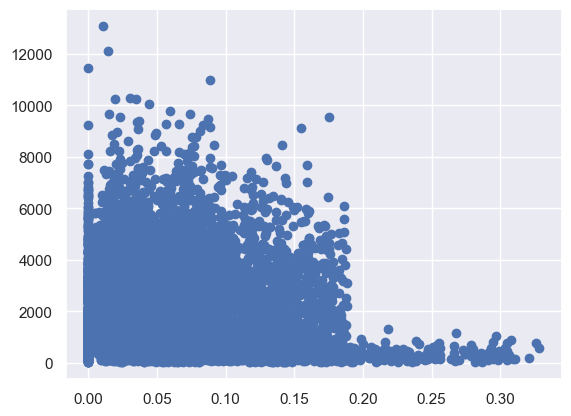

In [43]:
plt.scatter("Item_Visibility", "Item_Outlet_Sales", data = data_train)

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

#### Lets consider it as missing information and impute it with visibility of that product

In [44]:
data_train["Item_Visibility"] = data_train["Item_Visibility"].replace(0, data_train["Item_Visibility"].mean())
data_test["Item_Visibility"] = data_test["Item_Visibility"].replace(0, data_test["Item_Visibility"].mean())

Text(0, 0.5, 'Item Outlet Sales')

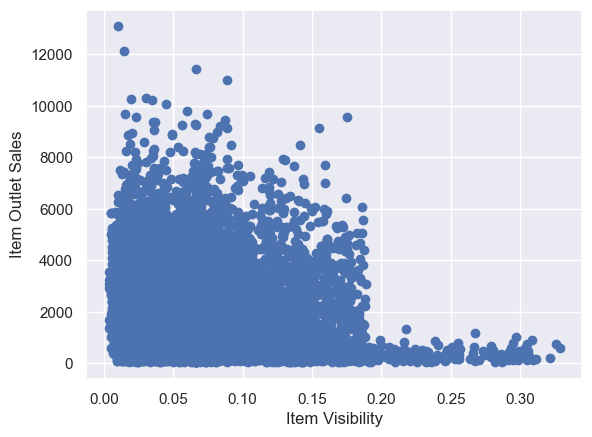

In [45]:
plt.scatter(x = "Item_Visibility", y = "Item_Outlet_Sales", data = data_train)
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

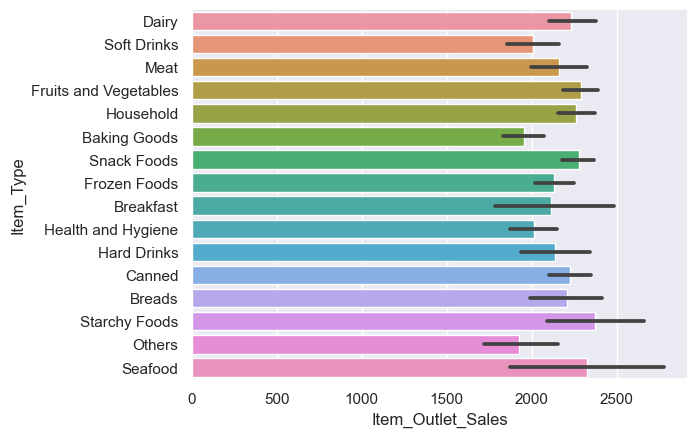

In [46]:
sns.barplot(x = "Item_Outlet_Sales", y = "Item_Type", data = data_train)

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item outlet sales')

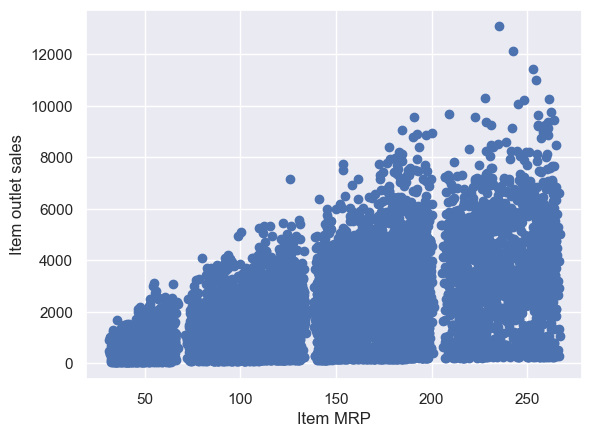

In [47]:
plt.scatter(x = "Item_MRP", y = "Item_Outlet_Sales", data = data_train)
plt.xlabel("Item MRP")
plt.ylabel("Item outlet sales")

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

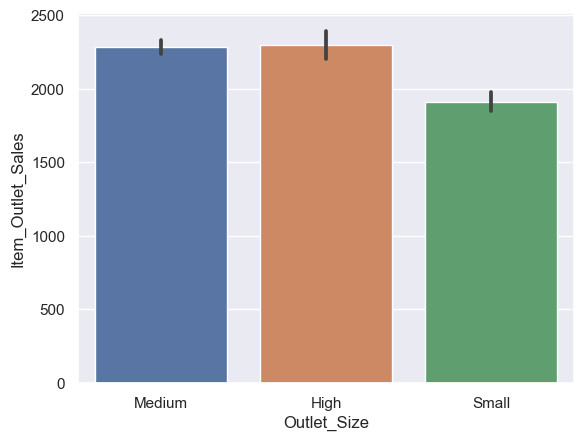

In [48]:
sns.barplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data = data_train)

The outlet sales is maximum for medium and high sized outlets, because people would like to get all the products from the same place

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

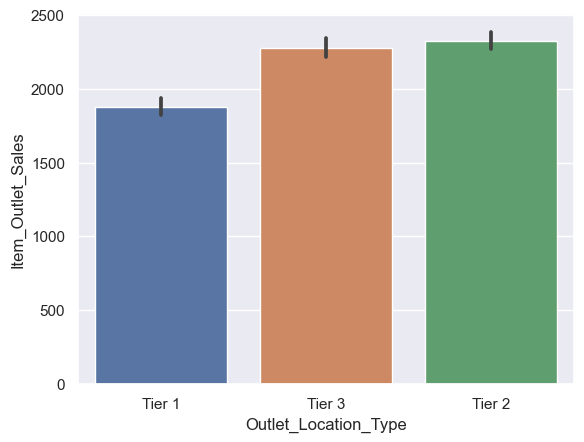

In [49]:
sns.barplot(x = "Outlet_Location_Type", y = "Item_Outlet_Sales", data = data_train)

<Axes: xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

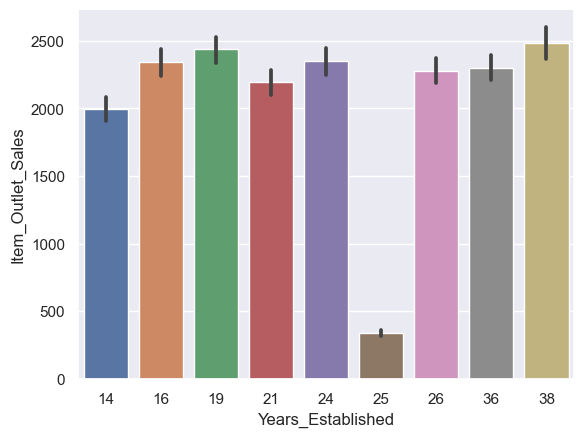

In [50]:
sns.barplot(x = "Years_Established", y = "Item_Outlet_Sales", data = data_train)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

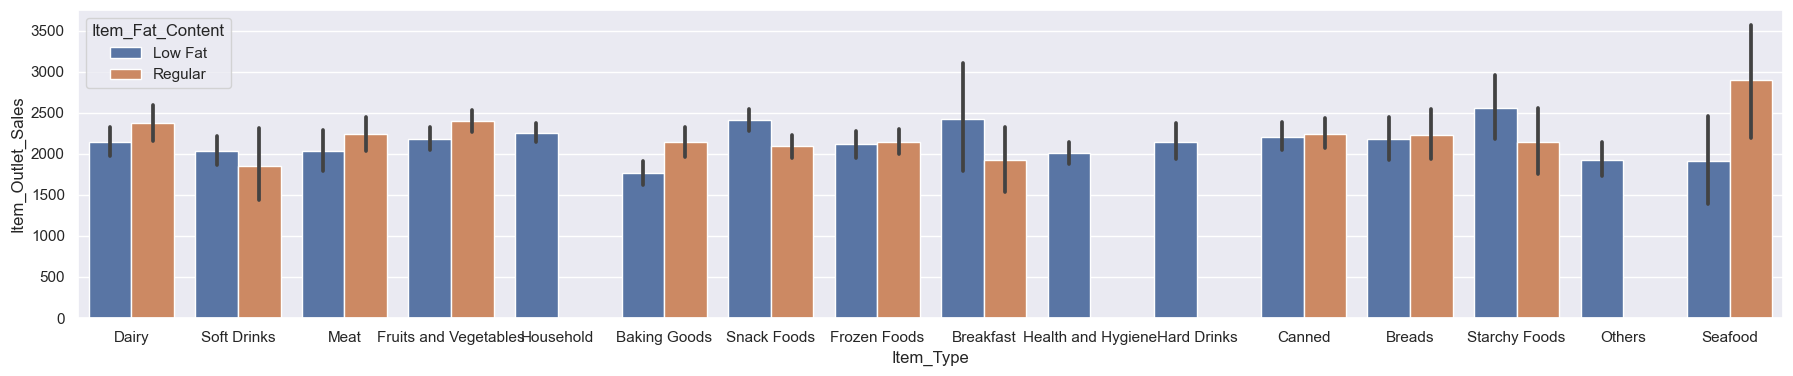

In [51]:
plt.figure(figsize = (22, 4))
sns.barplot(x = "Item_Type", y = "Item_Outlet_Sales", hue = "Item_Fat_Content", data = data_train)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

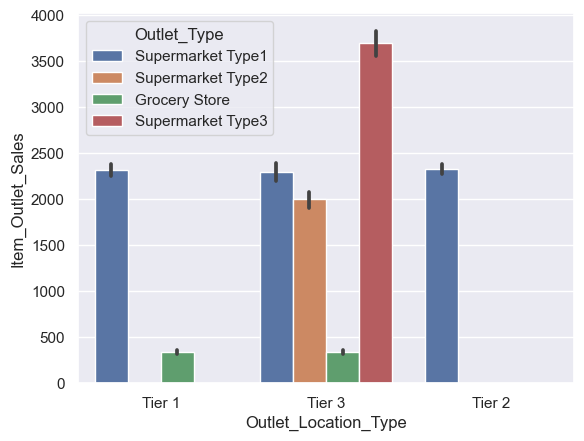

In [52]:
sns.barplot(x = "Outlet_Location_Type", y = "Item_Outlet_Sales", hue = "Outlet_Type", data = data_train)

## Feature Selection

In [53]:
encoder = LabelEncoder()
var = ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type"]

In [54]:
for i in var:
    data_train[i] = encoder.fit_transform(data_train[i])

for i in var:
    data_test[i] = encoder.fit_transform(data_test[i])

In [55]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,24
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,14
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,24
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,25
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,36


In [56]:
data_train = data_train.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], axis = 1)
data_test = data_test.drop(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], axis = 1)

In [57]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,24
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,14
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,24
3,19.20,1,0.066132,6,182.0950,1,2,0,732.3800,25
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052,36


In [58]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,0.007565,13,107.8622,1,0,1,24
1,8.300000,1,0.038428,4,87.3198,1,1,1,16
2,14.600000,0,0.099575,11,241.7538,1,2,0,25
3,7.315000,0,0.015388,13,155.0340,1,1,1,16
4,12.695633,1,0.118599,4,234.2300,1,2,3,38


## Splitting the data

In [59]:
X = data_train.drop("Item_Outlet_Sales", axis = 1)
Y = data_train["Item_Outlet_Sales"]

In [60]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,24
1,5.92,1,0.019278,14,48.2692,1,2,2,14
2,17.50,0,0.016760,10,141.6180,1,0,1,24
3,19.20,1,0.066132,6,182.0950,1,2,0,25
4,8.93,0,0.066132,9,53.8614,0,2,1,36


In [61]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

## Training of the Model

### Linear Regression

In [63]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [64]:
# r-squared error
r2 = r2_score(Y_test, y_pred_lr)
print("Linear Regression R squared error : ", r2)

Linear Regression R squared error :  0.495106527095887


### Random Forest Regressor

In [65]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
y_pred_rfr = rfr.predict(X_test)

In [66]:
# r-squared error
r2_rfr = r2_score(Y_test, y_pred_rfr)
print("Random Forest R squared error : ", r2_rfr)

Random Forest R squared error :  0.5609076349971738


### XGBoost Regressor

In [67]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

In [68]:
# r-squared error
r2_xgb = r2_score(Y_test, y_pred_xgb)
print("XGBoost R squared error : ", r2_xgb)

XGBoost R squared error :  0.5272524166570374
